<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_301_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E/20/301 - PraveenK.M.G.S.

# Week 01

## Activity 01

## Transverse Vibration Model (Euler–Bernoulli Beam)

For small-amplitude transverse vibrations of a slender beam, Euler–Bernoulli beam theory gives:

$$
\rho A \frac{\partial^2 y}{\partial t^2}
+ c \frac{\partial y}{\partial t}
+ EI \frac{\partial^4 y}{\partial x^4}
+ P \frac{\partial^2 y}{\partial x^2}
= f(t,x)
$$

where $P$ is the axial compressive force, $\rho$ is the density, $E$ is Young’s modulus, $I$ is the second moment of area, $A$ is the cross-sectional area, $c$ is the distributed viscous damping, and $f(t,x)$ is the external transverse load.

Since $P=0$, the PDE becomes:

$$
\rho A \frac{\partial^2 y}{\partial t^2}
+ c \frac{\partial y}{\partial t}
+ EI \frac{\partial^4 y}{\partial x^4}
= f(t,x)
$$

The beam has one end free and the base is elastically restrained in rotation. The rotational stiffness is:

$$
k_{\theta}=k_{\text{spring}}\,l_{\text{spring}}^2
$$

---

## Free Vibration Analysis (Mode Shapes)

Let $\mathfrak{F}$ be the infinite-dimensional vector space of four-times differentiable functions on $[0,L]$.  
Define the linear operator $H:\mathfrak{F}\to\mathfrak{F}$ as:

$$
H=\frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}
$$

Then the equation of motion can be written as:

$$
\frac{\partial^2 y}{\partial t^2}
+ C\frac{\partial y}{\partial t}
+ Hy
= q(t,x)
$$

with

$$
c=C\rho A,
\qquad
f(t,x)=\rho A\,q(t,x)
$$

Assume $H$ has eigenvalues $\{\omega_k^2\}_{k=1}^{\infty}$ and eigenfunctions $\{\psi_k\}_{k=1}^{\infty}$.  
Then the eigenvalue problem is:

$$
H\psi_k(x)=\omega_k^2\psi_k(x)
$$

Substituting $H$:

$$
\frac{EI}{\rho A}\frac{d^4\psi_k(x)}{dx^4}=\omega_k^2\psi_k(x)
$$

or

$$
\frac{d^4\psi_k(x)}{dx^4}
=
\frac{\rho A\omega_k^2}{EI}\psi_k(x)
=
\beta_k^4\psi_k(x)
$$

where

$$
\beta_k^4=\frac{\rho A\omega_k^2}{EI}
$$

---

## Boundary Conditions

The boundary conditions are:

$$
y(0,t)=0
$$

$$
EI\frac{\partial^2 y}{\partial x^2}(0,t)
-k_{\theta}\frac{\partial y}{\partial x}(0,t)=0
$$

$$
\frac{\partial^2 y}{\partial x^2}(l_{\text{beam}},t)=0
$$

$$
\frac{\partial^3 y}{\partial x^3}(l_{\text{beam}},t)=0
$$

---

## General Solution

The general solution of

$$
\psi_k^{(4)}(x)=\beta_k^4\psi_k(x)
$$

is:

$$
\psi_k(x)=A_k\cosh(\beta_k x)
+B_k\sinh(\beta_k x)
+C_k\cos(\beta_k x)
+D_k\sin(\beta_k x)
$$

---

## Base-End Conditions

At $x=0$:

$$
\psi_k(0)=0
\Rightarrow
A_k+C_k=0
\Rightarrow
C_k=-A_k
$$

Also,

$$
\psi_k'(0)=\beta_k(B_k+D_k)
$$

$$
\psi_k''(0)=\beta_k^2(A_k-C_k)
$$

Using the rotational spring condition:

$$
EI\psi_k''(0)-k_{\theta}\psi_k'(0)=0
$$

gives

$$
EI\beta_k^2(A_k-C_k)-k_{\theta}\beta_k(B_k+D_k)=0
$$

Substitute $C_k=-A_k$:

$$
2EI\beta_k^2A_k-k_{\theta}\beta_k(B_k+D_k)=0
$$

---

## Free-End Conditions

At $x=l_{\text{beam}}$:

$$
\psi_k''(l_{\text{beam}})=0
$$

$$
\psi_k'''(l_{\text{beam}})=0
$$

These give:

$$
A_k\big(\cosh(\beta_k l_{\text{beam}})+\cos(\beta_k l_{\text{beam}})\big)
+B_k\sinh(\beta_k l_{\text{beam}})
-D_k\sin(\beta_k l_{\text{beam}})=0
$$

$$
A_k\big(\sinh(\beta_k l_{\text{beam}})-\sin(\beta_k l_{\text{beam}})\big)
+B_k\cosh(\beta_k l_{\text{beam}})
-D_k\cos(\beta_k l_{\text{beam}})=0
$$

---

## Matrix Form

The system can be written as:

$$
\mathbf{H}(\beta_k)
\begin{bmatrix}
A_k\\
B_k\\
D_k
\end{bmatrix}
=
\mathbf{0}
$$

For a non-trivial solution:

$$
\det(\mathbf{H}(\beta_k))=0
$$

Hence, $\beta_k$ can be obtained numerically, and the constants $A_k,B_k,D_k$ can be found from the homogeneous system.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd


# ============================================================
# Characteristic determinant for elastically restrained base beam
# ============================================================
def characteristic_determinant(beta, L, EI, k_theta):
    """
    Returns det(H(beta)) where H is the 3x3 characteristic matrix.
    """
    z = beta * L

    csh, sh = np.cosh(z), np.sinh(z)
    c, s = np.cos(z), np.sin(z)

    H = np.array([
        [2.0 * EI * beta**2,     -k_theta * beta,   -k_theta * beta],
        [csh + c,                sh,                -s],
        [sh - s,                 csh,               -c]
    ], dtype=float)

    return det(H)


# ============================================================
# Root finder for beta values (sign-change bracketing + Brent)
# ============================================================
def compute_beta_roots(L, EI, k_theta, n_modes=2, beta_upper=50.0, n_grid=6000):
    """
    Finds first n_modes positive roots of det(H(beta)) = 0.
    """
    beta_grid = np.linspace(1e-6, beta_upper, n_grid)
    det_grid = np.array([characteristic_determinant(b, L, EI, k_theta) for b in beta_grid])

    roots = []
    for j in range(n_grid - 1):
        f1, f2 = det_grid[j], det_grid[j + 1]

        # detect sign change
        if f1 == 0:
            roots.append(beta_grid[j])
        elif f1 * f2 < 0:
            r = brentq(characteristic_determinant,
                       beta_grid[j], beta_grid[j + 1],
                       args=(L, EI, k_theta))
            roots.append(r)

        if len(roots) >= n_modes:
            break

    return np.array(roots, dtype=float)


# ============================================================
# Mode shape coefficient extraction using SVD null space
# ============================================================
def solve_mode_coefficients(beta, L, EI, k_theta):
    """
    Computes constants A,B,C,D for:
        psi(x)=A cosh(bx)+B sinh(bx)+C cos(bx)+D sin(bx)
    using SVD to find the null space of H(beta).

    Unknown vector: [A, B, D]^T and C = -A from BC at x=0.
    """
    z = beta * L

    csh, sh = np.cosh(z), np.sinh(z)
    c, s = np.cos(z), np.sin(z)

    H = np.array([
        [2.0 * EI * beta**2,     -k_theta * beta,   -k_theta * beta],
        [csh + c,                sh,                -s],
        [sh - s,                 csh,               -c]
    ], dtype=float)

    # SVD: last row of V^H corresponds to smallest singular value
    _, _, Vh = svd(H)
    null_vec = Vh[-1, :]   # ~ [A, B, D]

    A, B, D = null_vec
    C = -A
    return A, B, C, D


## Eigenvalues and Eigenfunctions (Mode Shapes)

The eigenvalues of the operator $H$ are:

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\,\beta_k^4
\right\}_{k=1}^{\infty}
$$

The corresponding eigenfunctions (mode shapes) are:

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
A_k\cosh(\beta_k x)
+
B_k\sinh(\beta_k x)
+
C_k\cos(\beta_k x)
+
D_k\sin(\beta_k x)
\right\}_{k=1}^{\infty}
$$

The constants $A_k$, $B_k$, $C_k$, and $D_k$ are obtained numerically using the previously defined functions.

---

## Forced Vibration Response Using Modal Expansion

When the exciter is switched on, the beam undergoes forced vibration due to an oscillatory force $Q$.

<center>
<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig3.png?raw=1"
       width="60%"
       style="display: block; margin: 0 auto;">
  <span style="display: block; text-align: center; margin-top: 5px;">
    <em>Figure 2: Oscillating Force of the Exciter (Reference: TM1016V User Guide 1022, Figure 18)</em>
  </span>
</div>
</center>

Assuming no base excitation, the external loading can be modeled as:

$$
q(x,t)
=
Q\sin(\Omega t)\,\delta(x-l_{\text{exciter}})
$$

Using modal expansion, the PDE can be reduced into decoupled forced and damped SDOF oscillators:

$$
\ddot{y} + C\dot{y} + Hy = q(x,t)
\quad \Rightarrow \quad
m_k\ddot{z}_k
+
2\zeta_k\omega_k m_k \dot{z}_k
+
m_k\omega_k^2 z_k
=
\langle\langle \psi_k(x), q(x,t)\rangle\rangle
$$

where

$$
\zeta_k=\frac{C}{2\omega_k},
\qquad
m_k=\int_{0}^{l_{\text{beam}}}\rho A\,\psi_k^2(x)\,dx
$$

The modal mass $m_k$ removes the arbitrary scaling caused by the selection of $B_k$ and $D_k$.

Solving the decoupled ODE for each mode gives:

$$
z_k(t)=\chi_k(\Omega)\cos\left(\Omega t+\phi_k(\Omega)\right)
$$

where $\chi_k(\Omega)$ is the steady-state amplitude and $\phi_k(\Omega)$ is the phase lag at forcing frequency $\Omega$.

---

## Modal Forcing Term

The mode shapes are orthonormal under the inner product:

$$
\langle\langle \psi_k(x), q(x)\rangle\rangle
=
\int_{0}^{l_{\text{beam}}}\psi_k(x)\,q(x)\,dx
$$

Substituting $q(x,t)$:

$$
\langle\langle \psi_k(x), q(x,t)\rangle\rangle
=
\int_{0}^{l_{\text{beam}}}
\psi_k(x)\,Q\sin(\Omega t)\,\delta(x-l_{\text{exciter}})\,dx
$$

$$
=
Q\sin(\Omega t)
\int_{0}^{l_{\text{beam}}}
\psi_k(x)\,\delta(x-l_{\text{exciter}})\,dx
$$

$$
=
Q\sin(\Omega t)\,\psi_k(l_{\text{exciter}})
$$

---

## Steady-State Amplitude and Phase

The steady-state amplitude is defined as:

$$
\chi_k(\Omega)
=
\left|
\frac{
\langle\langle \psi_k(x), q(x)\rangle\rangle
}{
m_k\sqrt{(\omega_k^2-\Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}
}
\right|
$$

Substituting the forcing projection:

$$
\chi_k(\Omega)
=
\left|
\frac{
Q\,\psi_k(l_{\text{exciter}})
}{
m_k\sqrt{(\omega_k^2-\Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}
}
\right|
$$

The phase lag is:

$$
\phi_k(\Omega)
=
\arctan\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2-\Omega^2}
\right)
$$

Hence, the infinite-dimensional response is:

$$
y(t,x)
=
\sum_{k=1}^{\infty} z_k(t)\psi_k(x)
=
\sum_{k=1}^{\infty}
\chi_k(\Omega)\cos\left(\Omega t+\phi_k(\Omega)\right)\psi_k(x)
$$

---

## Reduction to a 2-DOF Model (First Two Dominant Modes)

Truncating to the first two modes gives:

$$
y(t,x)
\approx
\chi_1(\Omega)\cos(\Omega t+\phi_1(\Omega))\,\psi_1(x)
+
\chi_2(\Omega)\cos(\Omega t+\phi_2(\Omega))\,\psi_2(x)
$$

The corresponding reduced 2-DOF system is:

$$
\underbrace{
\begin{bmatrix}
m_1 & 0\\
0 & m_2
\end{bmatrix}
}_{M_{\text{beam}}}
\begin{bmatrix}
\ddot{z}_1\\
\ddot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
2\zeta_1\omega_1 m_1 & 0\\
0 & 2\zeta_2\omega_2 m_2
\end{bmatrix}
}_{C_{\text{beam}}}
\begin{bmatrix}
\dot{z}_1\\
\dot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
\omega_1^2 m_1 & 0\\
0 & \omega_2^2 m_2
\end{bmatrix}
}_{K_{\text{beam}}}
\begin{bmatrix}
z_1\\
z_2
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
Q\psi_1(l_{\text{exciter}})\sin(\Omega t)\\[1mm]
Q\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}
}_{F_{\text{exciter}}}
$$

---

## Spring–Damper Attachment Effects

<center>
<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig2.png?raw=1"
       width="55%"
       style="display: block; margin: 0 auto;">
  <span style="display: block; text-align: center; margin-top: 5px;">
    <em>Figure 3: Schematic Details of the Viscous Damper (Reference: TM1016V User Guide 1022, Figure 13)</em>
  </span>
</div>
</center>

### Part I: Additional Mass Contribution

According to Rayleigh’s theory, the effective spring mass contribution is one third of the spring mass, plus the fixing mass:

$$
m_{\text{eff}}
=
\frac{1}{3}m_{\text{spring}}+m_{\text{fixed}}
$$

Using the two-mode approximation, the transverse acceleration at the spring location is:

$$
\ddot{y}(l_{\text{spring}},t)
=
\ddot{z}_1(t)\psi_1(l_{\text{spring}})
+
\ddot{z}_2(t)\psi_2(l_{\text{spring}})
$$

The inertia force from the attached effective mass is:

$$
F_{\text{inertia}}(t)
=
m_{\text{eff}}\,\ddot{y}(l_{\text{spring}},t)
$$

Modal inertia force contribution for each mode:

$$
F_k^{(m)}(t)
=
F_{\text{inertia}}(t)\,\psi_k(l_{\text{spring}})
$$

This leads to the matrix form:

$$
\begin{bmatrix}
F_1^{(m)}\\
F_2^{(m)}
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot{z}_1\\
\ddot{z}_2
\end{bmatrix}
$$

where

$$
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}})\\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}
$$

Similarly, the additional mass matrices for damper and exciter are:

$$
M_{\text{damper}}
=
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}})\\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

$$
M_{\text{exciter}}
=
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}})\\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}
$$

---

### Part II: Damper Attachment (Viscous Damping Force)

For the viscous damper:

$$
F_{\text{damper}}(t)=c_{\text{damper}}\,\dot{y}(l_{\text{damper}},t)
$$

Using the two-mode approximation:

$$
\dot{y}(l_{\text{damper}},t)
=
\dot{z}_1(t)\psi_1(l_{\text{damper}})
+
\dot{z}_2(t)\psi_2(l_{\text{damper}})
$$

Projecting onto the $k^{\text{th}}$ modal coordinate gives:

$$
F_k^{(c)}(t)
=
c_{\text{damper}}
\left(
\dot{z}_1\psi_1(l_{\text{damper}})
+
\dot{z}_2\psi_2(l_{\text{damper}})
\right)
\psi_k(l_{\text{damper}})
$$

Thus:

$$
\begin{bmatrix}
F_1^{(c)}\\
F_2^{(c)}
\end{bmatrix}
=
C_{\text{damper}}
\begin{bmatrix}
\dot{z}_1\\
\dot{z}_2
\end{bmatrix}
$$

where

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}})\\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

---

## Final Reduced 2-DOF System

Including beam contributions and the spring/damper/exciter effects, the reduced system becomes:

$$
\left(
M_{\text{beam}}
+
M_{\text{spring}}
+
M_{\text{damper}}
+
M_{\text{exciter}}
\right)\ddot{\mathbf{z}}
+
\left(
C_{\text{beam}}
+
C_{\text{damper}}
\right)\dot{\mathbf{z}}
+
K_{\text{beam}}\mathbf{z}
=
F_{\text{exciter}}
$$

where

$$
M,\;C,\;K\in\mathbb{M}_{2\times 2},
\qquad
\mathbf{F},\;\mathbf{z}\in\mathbb{R}^{2}
$$


Functions

In [11]:
import numpy as np
from numpy.linalg import det
from scipy.linalg import svd
from scipy.optimize import brentq
from scipy.integrate import quad

# ========= Determinant of Characteristic Matrix =========
def char_det(beta, l_beam, EI, k_theta):
    bL = beta * l_beam
    H = np.array([
        [2*EI*beta**2, -k_theta*beta, -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])
    return det(H)

# ========= Find beta roots =========
def find_betas(l_beam, EI, k_theta, n_roots=2, beta_max=50):
    betas = []
    beta_vals = np.linspace(1e-4, beta_max, 5000)
    f_vals = [char_det(b, l_beam, EI, k_theta) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i]*f_vals[i+1] < 0:
            root = brentq(char_det, beta_vals[i], beta_vals[i+1],
                          args=(l_beam, EI, k_theta))
            betas.append(root)
            if len(betas) >= n_roots:
                break
    return np.array(betas)

# ========= Solve for mode shape coefficients =========
def mode_shape_coefficients(beta, l_beam, EI, k_theta):
    bL = beta * l_beam
    H = np.array([
        [2*EI*beta**2, -k_theta*beta, -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])
    U, S, Vh = svd(H)
    v = Vh[-1, :].copy()  # vector ~ [A, B, D]
    A, B, D = v
    C = -A
    return A, B, C, D

# ========= Mode shape function =========
def mode_shape(x, beta, l_beam, EI, k_theta):
    A, B, C, D = mode_shape_coefficients(beta, l_beam, EI, k_theta)
    return A*np.cosh(beta*x) + B*np.sinh(beta*x) + C*np.cos(beta*x) + D*np.sin(beta*x)


Beam Properties and Calculations

In [12]:
# ================= Beam Properties =================
b = 0.025
h = 0.01
A = b*h
m_beam = 1.65
l_beam = 0.815
E = 2e11
I = b*h**3/12
rho = m_beam/(A*l_beam)
EI = E*I

# ================= Spring Properties =================
k_spring = 3800
l_spring = 0.75
m_spring = 0.388
m_fixed = 0.009
k_theta = k_spring * l_spring**2

# ================= Damper Properties =================
l_damper = 0.2
m_damper = 0.53

# ================= Exciter Properties =================
l_exciter = 0.4
m_exciter = 4.2

# ================= Find first two betas =================
betas = find_betas(l_beam, EI, k_theta, n_roots=2)
beta1, beta2 = betas
print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")

# ================= Evaluate psi at key points =================
def eval_psi(beta):
    return {
        "spring": mode_shape(l_spring, beta, l_beam, EI, k_theta),
        "damper": mode_shape(l_damper, beta, l_beam, EI, k_theta),
        "exciter": mode_shape(l_exciter, beta, l_beam, EI, k_theta)
    }

psi1 = eval_psi(beta1)
psi2 = eval_psi(beta2)
print(f"psi1(l_spring)={psi1['spring']:.4f}, psi2(l_spring)={psi2['spring']:.4f}")
print(f"psi1(l_damper)={psi1['damper']:.4f}, psi2(l_damper)={psi2['damper']:.4f}")
print(f"psi1(l_exciter)={psi1['exciter']:.4f}, psi2(l_exciter)={psi2['exciter']:.4f}")

# ================= Modal Mass =================
def modal_mass(beta):
    integrand = lambda x: rho*A*mode_shape(x,beta,l_beam,EI,k_theta)**2
    m, _ = quad(integrand,0,l_beam)
    return m

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)

# ================= Natural frequencies =================
omega1 = beta1**2 * np.sqrt(EI/(rho*A))
omega2 = beta2**2 * np.sqrt(EI/(rho*A))
print(f"Modal masses: m1={m1:.4f}, m2={m2:.4f}")
print(f"Natural frequencies: omega1={omega1:.4f}, omega2={omega2:.4f}")

# ================= Beam, spring, damper, exciter matrices =================
M_beam = np.diag([m1, m2])
K_beam = np.diag([m1*omega1**2, m2*omega2**2])

# Effective spring mass (Rayleigh 1/3 rule)
m_eff_spring = m_spring/3 + m_fixed

def added_mass_matrix(mass, psi_vals):
    psi1, psi2 = psi_vals['spring'], psi_vals['damper']
    return mass * np.array([[psi1**2, psi1*psi2],[psi1*psi2, psi2**2]])

M_spring = m_eff_spring * np.array([[psi1['spring']**2, psi1['spring']*psi2['spring']],
                                    [psi1['spring']*psi2['spring'], psi2['spring']**2]])
M_damper = m_damper * np.array([[psi1['damper']**2, psi1['damper']*psi2['damper']],
                                [psi1['damper']*psi2['damper'], psi2['damper']**2]])
M_exciter = m_exciter * np.array([[psi1['exciter']**2, psi1['exciter']*psi2['exciter']],
                                 [psi1['exciter']*psi2['exciter'], psi2['exciter']**2]])

def print_matrix(name, M):
    print(f"\n{name}:")
    for r in M:
        print("  [" + ", ".join(f"{v:10.3f}" for v in r) + "]")

print_matrix("M_beam", M_beam)
print_matrix("M_spring", M_spring)
print_matrix("M_damper", M_damper)
print_matrix("M_exciter", M_exciter)
print_matrix("K_beam", K_beam)


beta1 = 1.9417, beta2 = 5.1942
psi1(l_spring)=-1.3706, psi2(l_spring)=-0.8789
psi1(l_damper)=-0.2491, psi2(l_damper)=0.7102
psi1(l_exciter)=-0.6133, psi2(l_exciter)=0.8923
Modal masses: m1=1.0818, m2=0.7688
Natural frequencies: omega1=54.0892, omega2=387.0553

M_beam:
  [     1.082,      0.000]
  [     0.000,      0.769]

M_spring:
  [     0.260,      0.167]
  [     0.167,      0.107]

M_damper:
  [     0.033,     -0.094]
  [    -0.094,      0.267]

M_exciter:
  [     1.580,     -2.298]
  [    -2.298,      3.344]

K_beam:
  [  3164.958,      0.000]
  [     0.000, 115171.455]


# Activity 02

The dynamic behavior of the 2-DOF system with additional attachments can be expressed as:

$$
\mathbf{M} \, \mathbf{\ddot{z}}(t) + \mathbf{C} \, \mathbf{\dot{z}}(t) + \mathbf{K} \, \mathbf{z}(t) = \mathbf{F}_{\text{exciter}}(t)
$$

where the mass, damping, and stiffness matrices are composed as follows:

$$
\mathbf{M} = \mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}, \quad
\mathbf{C} = \mathbf{C_\text{beam}} + \mathbf{C_\text{damper}}, \quad
\mathbf{K} = \mathbf{K_\text{beam}}
$$

To investigate the **free vibration characteristics** of the system, we neglect external forcing and solve:

$$
\mathbf{M} \, \mathbf{\ddot{z}}(t) + \mathbf{C} \, \mathbf{\dot{z}}(t) + \mathbf{K} \, \mathbf{z}(t) = \mathbf{0}
$$

Assuming **undamped motion** (i.e., ignoring $\mathbf{C}$) and a harmonic solution of the form:

$$
\mathbf{z}(t) = \boldsymbol{\phi} \, e^{j \omega t}
$$

we obtain the standard eigenvalue problem for the system:

\begin{align*}
(\mathbf{K} - \omega^2 \mathbf{M}) \, \boldsymbol{\phi} &= \mathbf{0} \\
\text{det}(\mathbf{K} - \omega^2 \mathbf{M}) &= 0
\end{align*}

Solving this characteristic equation yields the **two natural frequencies** $\omega_1$ and $\omega_2$ along with their corresponding **mode shapes** $\boldsymbol{\phi}_1$ and $\boldsymbol{\phi}_2$, where each mode shape vector lies in $\mathbb{R}^2$.  

The **modal matrix**, which collects the normalized mode shapes of the system, can then be written as:

$$
\boldsymbol{\Phi} =
\begin{bmatrix}
\boldsymbol{\phi}_1 & \boldsymbol{\phi}_2
\end{bmatrix}
$$

Numerical evaluation of the matrices $\mathbf{M}$ and $\mathbf{K}$ allows direct computation of these **natural frequencies** and **mode shapes** for the 2-DOF system with spring, damper, and exciter attachments.


In [14]:
import numpy as np
from scipy.linalg import eigh  # make sure eigh is imported

# ================= Compute Natural Frequencies for Complete System =================
# Assemble total mass and stiffness matrices
M_total = M_beam + M_spring + M_damper + M_exciter
K_total = K_beam  # stiffness only from the beam

# Solve the generalized eigenvalue problem K*phi = omega^2 * M*phi
eigenvalues, eigenvectors = eigh(K_total, M_total)
natural_frequencies = np.sqrt(eigenvalues)

# Display the results in rad/s and Hz
print("Natural frequencies of the system including attachments:")
for idx, freq in enumerate(natural_frequencies, start=1):
    print(f"Mode {idx}: {freq:.3f} rad/s = {freq/(2*np.pi):.3f} Hz")

# Store the mode shapes in a modal matrix
ModalMatrix = eigenvectors

# Function to nicely print 2x2 matrices
def print_matrix(name, M):
    print(f"\n{name}:")
    for r in M:
        print("  [" + ", ".join(f"{v:10.3f}" for v in r) + "]")

print_matrix("Modal Matrix", ModalMatrix)


Natural frequencies of the system including attachments:
Mode 1: 32.472 rad/s = 5.168 Hz
Mode 2: 204.048 rad/s = 32.475 Hz

Modal Matrix:
  [    -0.573,      0.461]
  [     0.012,      0.596]


Let us introduce a **modal coordinate vector** $\mathbf{q}(t)$ such that the physical displacements $\mathbf{z}(t)$ are expressed in terms of the system’s mode shapes:

$$
\mathbf{z}(t) = \boldsymbol{\Phi} \, \mathbf{q}(t)
$$

Substituting this into the original **forced vibration equation** of the system:

$$
\mathbf{M} \mathbf{\ddot{z}} + \mathbf{C} \mathbf{\dot{z}} + \mathbf{K} \mathbf{z} = \mathbf{F}_{\text{exciter}}
$$

we obtain:

$$
\mathbf{M} \boldsymbol{\Phi} \, \mathbf{\ddot{q}} + \mathbf{C} \boldsymbol{\Phi} \, \mathbf{\dot{q}} + \mathbf{K} \boldsymbol{\Phi} \, \mathbf{q} = \mathbf{F}_{\text{exciter}}
$$

By **pre-multiplying** both sides with the transpose of the modal matrix, $\boldsymbol{\Phi}^T$, we can define the **modal matrices** as:

\begin{align*}
\mathbf{M}_m &= \boldsymbol{\Phi}^T \mathbf{M} \boldsymbol{\Phi} \\
\mathbf{C}_m &= \boldsymbol{\Phi}^T \mathbf{C} \boldsymbol{\Phi} \\
\mathbf{K}_m &= \boldsymbol{\Phi}^T \mathbf{K} \boldsymbol{\Phi} \\
\mathbf{F}_m &= \boldsymbol{\Phi}^T \mathbf{F}_{\text{exciter}}
\end{align*}

so that the **modal equations of motion** take the compact form:

$$
\mathbf{M}_m \, \mathbf{\ddot{q}} + \mathbf{C}_m \, \mathbf{\dot{q}} + \mathbf{K}_m \, \mathbf{q} = \mathbf{F}_m
$$

For **undamped free vibrations**, and using the eigenvectors of $(\mathbf{K}, \mathbf{M})$, the **modal mass** $\mathbf{M}_m$ and **modal stiffness** $\mathbf{K}_m$ matrices are **diagonal**. This implies that in the absence of damping, each mode behaves as an **independent single-degree-of-freedom oscillator**:

$$
\mathbf{M}_m \, \mathbf{\ddot{q}} + \mathbf{C}_m \, \mathbf{\dot{q}} + \mathbf{K}_m \, \mathbf{q} = 0
$$

If the damping matrix $\mathbf{C}_m$ is also diagonal (i.e., damping does not couple the modes), then each modal coordinate $q_k(t)$ satisfies the classical 1-DOF equation:

$$
\ddot{q}_k + 2 \zeta_k \omega_k \dot{q}_k + \omega_k^2 q_k = 0
$$

From the general definition of **modal damping ratio**, we can write:

$$
\zeta_k = \frac{\boldsymbol{\phi}_k^T \mathbf{C} \, \boldsymbol{\phi}_k}{2 \, \omega_k \, \boldsymbol{\phi}_k^T \mathbf{M} \, \boldsymbol{\phi}_k} \tag{2}
$$

In our system, the damping matrix $\mathbf{C}$ consists of contributions from the beam itself and the additional viscous damper:

$$
\mathbf{C} = \mathbf{C}_{\text{beam}} + \mathbf{C}_{\text{damper}}
$$

The **beam damping matrix** $\mathbf{C}_{\text{beam}}$ is diagonal in the modal space due to the orthogonality of the eigenvectors of the beam alone. The **damper contribution** in physical coordinates is given by:

\begin{align*}
\mathbf{C}_{\text{damper}} &= c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) & \psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) & \psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

where $\psi_1(x)$ and $\psi_2(x)$ are the **mode shapes of the beam alone**, evaluated at the damper location $l_{\text{damper}}$.  

By projecting the damper matrix into the modal space, it is possible to account for **modal damping ratios** of the full system, while maintaining a **diagonal approximation** if modal coupling is negligible. This allows each mode to be treated as a **quasi-independent 1-DOF oscillator**, simplifying the analysis of forced and free vibration responses.


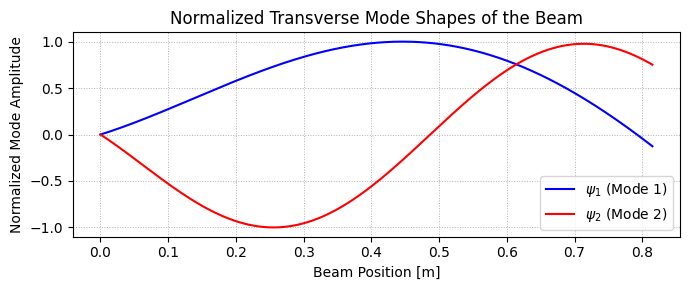

In [17]:
# ================= Plotting Beam Mode Shapes =================
# Discretize the beam along its length
positions = np.linspace(0, l_beam, 1000)

# Compute mode shapes at all positions
mode_shape_1 = psi(positions, beta1, l_beam, E*I, k_theta)
mode_shape_2 = psi(positions, beta2, l_beam, E*I, k_theta)

# Normalize the mode shapes for comparison
mode_shape_1 /= np.max(np.abs(mode_shape_1))
mode_shape_2 /= np.max(np.abs(mode_shape_2))

# Plot the normalized mode shapes
plt.figure(figsize=(7, 3))
plt.plot(positions, mode_shape_1, color='blue', label=r'$\psi_1$ (Mode 1)')
plt.plot(positions, mode_shape_2, color='red', label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Beam Position [m]')
plt.ylabel('Normalized Mode Amplitude')
plt.title('Normalized Transverse Mode Shapes of the Beam')
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


From the results obtained, it can be observed that at $l_{damper} = 0.2\,\text{m}$, the magnitude of $\psi_1(l_{damper})$ is much smaller than that of $\psi_2(l_{damper})$. Specifically, the computed values are $\psi_1(l_{damper}) = -0.2491$ and $\psi_2(l_{damper}) = 0.7102$. Consequently, we have:

$$
\psi_2^2(l_{damper}) = 0.5044, \quad \psi_1(l_{damper})\psi_2(l_{damper}) = -0.1769
$$

Hence, $|\psi_1(l_{damper})| \ll |\psi_2(l_{damper})|$, allowing us to neglect the off-diagonal elements of $C_{damper}$, indicating that mode coupling is minimal. Therefore, we adopt **Rayleigh proportional damping** for this system:

$$
\mathbf{C} = \alpha\,\mathbf{M} + \beta\,\mathbf{K}
$$

Then, for a mode shape $\phi_k$:

$$
\phi_k^T\mathbf{C}\phi_k = \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,\phi_k^T\mathbf{K}\phi_k \tag{3}
$$

Recall the eigenvalue relation:

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\phi &= 0 \\
\phi_k^T\mathbf{K}\phi_k &= \omega_k^2 \phi_k^T \mathbf{M} \phi_k
\end{align*}

Substituting this into equation $(3)$ gives:

\begin{align*}
\phi_k^T\mathbf{C}\phi_k &= \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta (\omega_k^2 \phi_k^T\mathbf{M}\phi_k) \\
\phi_k^T\mathbf{C}\phi_k &= (\alpha + \beta \omega_k^2) \phi_k^T \mathbf{M} \phi_k
\end{align*}

Using the definition of modal damping ratio:

$$
\zeta_k = \frac{\phi_k^T \mathbf{C} \phi_k}{2 \omega_k \phi_k^T \mathbf{M} \phi_k}
$$

leads to:

$$
\zeta_k = \frac{1}{2} \left( \frac{\alpha}{\omega_k} + \beta \omega_k \right)
$$

Since $|\psi_1(l_{beam})| \ll |\psi_2(l_{beam})|$, the damper is positioned near the antinode of the second mode and near the node of the first mode. This implies the damping primarily influences the second, higher-frequency mode. Therefore, the system can be approximated using stiffness-proportional damping ($\zeta_2 > \zeta_1$) by taking $\alpha = 0$:

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$

Given that the exciter in the experiment operates up to 17 Hz and $\omega_2 > 17$ Hz, only $\zeta_1$ at $\omega_1$ can be measured directly. The second-mode damping can then be determined using:

$$
\zeta_1 = \frac{\beta \omega_1}{2}, \quad \zeta_2 = \frac{\beta \omega_2}{2}
$$

or equivalently:

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$


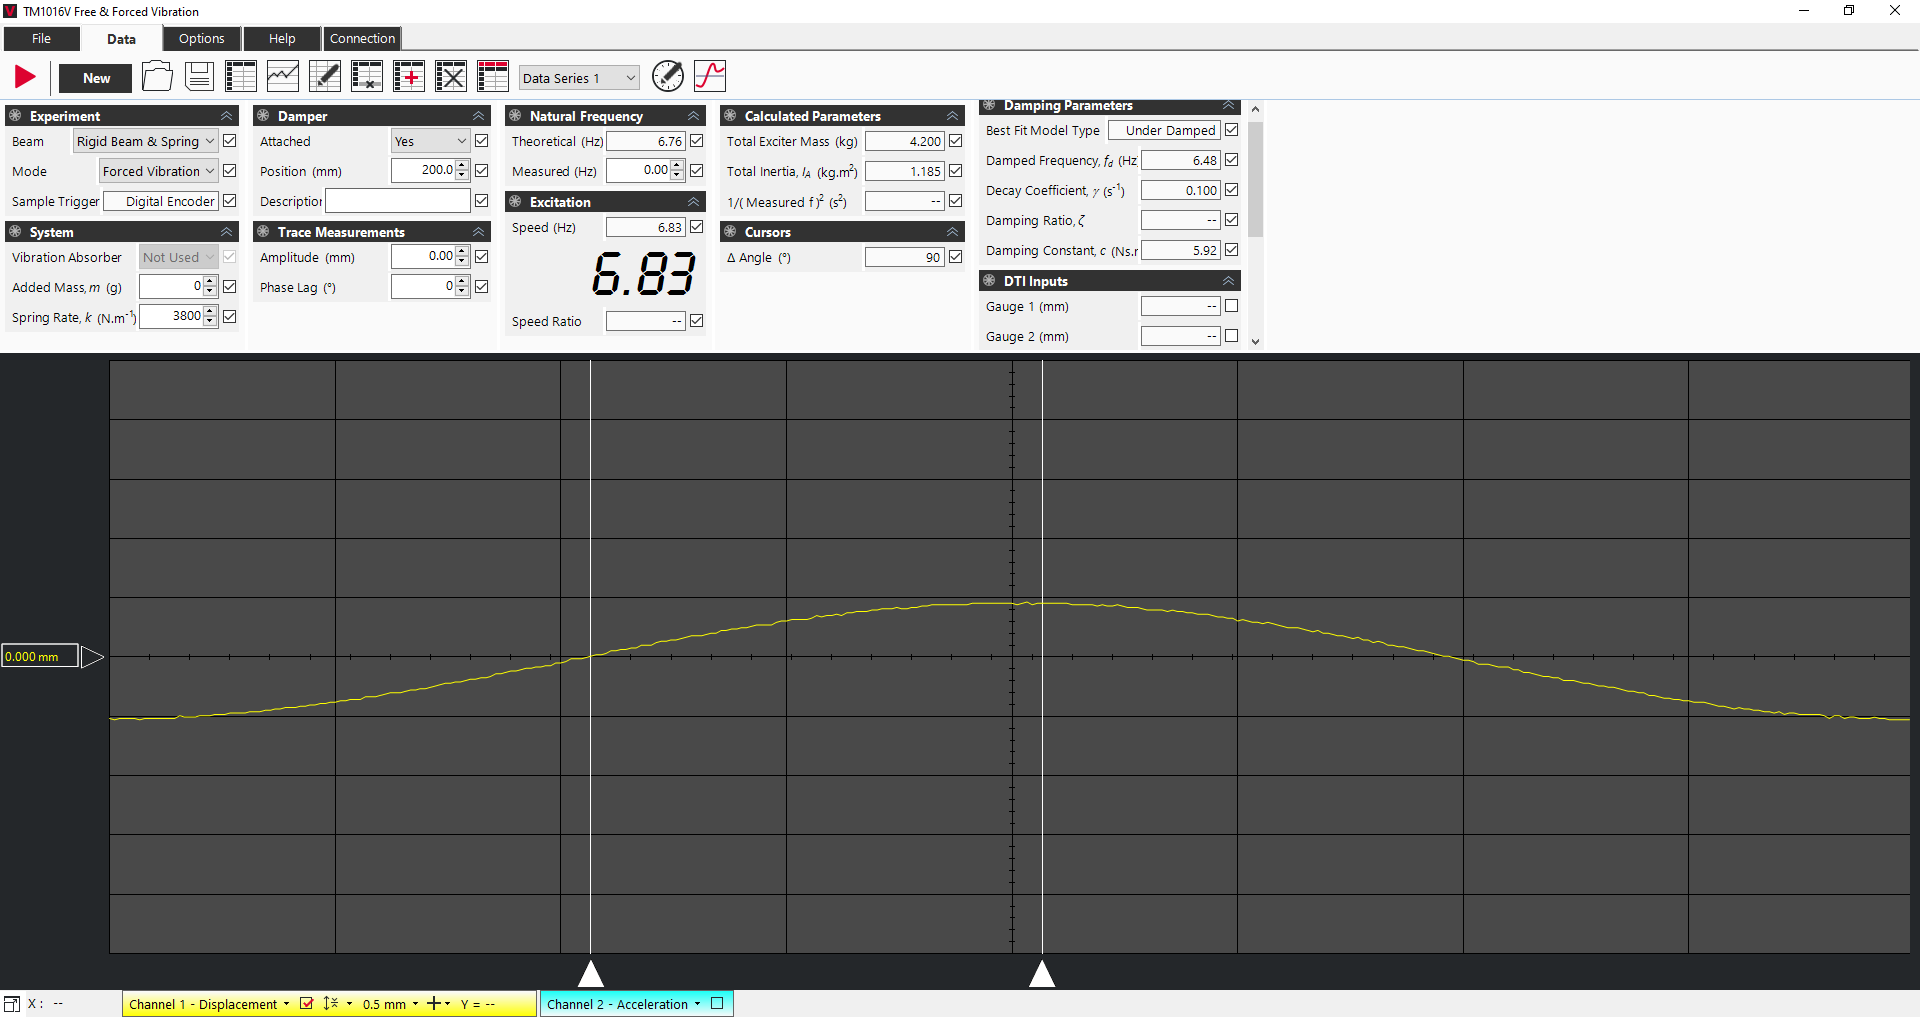

Since the initial displacement was applied at the free end of the beam, the resulting free-decay response is primarily governed by the first mode. This is because the first mode has its antinode, or point of maximum displacement, located at the free end of the beam. Consequently, the damping ratio observed from this response corresponds to the first-mode damping, $\zeta_1$.

Using the Rayleigh proportional damping assumption, the second-mode damping ratio can be estimated from the first-mode damping ratio and the corresponding natural frequencies:

\begin{align*}
\zeta_2 &= \zeta_1 \frac{\omega_2}{\omega_1} \\
\zeta_2 &= 0.008 \times \frac{204.048\,\text{rad/s}}{32.472\,\text{rad/s}} \\
\zeta_2 &= 0.05
\end{align*}

Therefore, the estimated damping ratios for the first two dominant vibration modes of the beam are:

$$
\zeta_1 = 0.008 \quad \text{and} \quad \zeta_2 = 0.05
$$

This indicates that the second mode, which has a higher natural frequency, experiences greater damping than the first mode. This behavior is consistent with the positioning of the damper closer to the second-mode antinode, which causes it to have a more significant effect on the higher-frequency mode.


# Activity 03

**3.1 Unforced Response to an Initial Displacement at the Free End of the Beam**

Considering the system in modal coordinates, the generalized displacement vector $\mathbf{z}(t)$ can be expressed as:

$$
\mathbf{z}(t) = \Phi \, \mathbf{q}(t)
$$

or explicitly for the 2-DOF system:

$$
\begin{bmatrix}
z_1(t) \\[2mm]
z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\[1mm] q_2(t)
\end{bmatrix}
$$

For the beam alone, the truncated 2-DOF representation of the transverse displacement $y(x,t)$ is:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x)
$$

To account for the complete system including attachments, the mode shapes can be rewritten as combinations of the original beam modes and the modal transformation:

\begin{align*}
y(x,t) &= (\phi_{11} q_1(t) + \phi_{12} q_2(t)) \psi_1(x) + (\phi_{21} q_1(t) + \phi_{22} q_2(t)) \psi_2(x) \\[1mm]
y(x,t) &= \underbrace{\phi_{11}\psi_1(x) + \phi_{21}\psi_2(x)}_{\psi_1^*(x)} q_1(t) \;+\; \underbrace{\phi_{12}\psi_1(x) + \phi_{22}\psi_2(x)}_{\psi_2^*(x)} q_2(t)
\end{align*}

Let the initial displacement applied at the free end of the beam be $y(l_{beam},0) = y_0$. Then, the initial condition can be expressed as:

$$
y_0 = \psi_1^*(l_{beam}) q_1(0) + \psi_2^*(l_{beam}) q_2(0)
$$

Since there are two unknown modal amplitudes but the displacement is applied at the free end (where the first mode has its maximum), it is reasonable to assume that the initial response is dominated by the first mode:

$$
q_2(0) = 0 \quad \Rightarrow \quad q_1(0) = \frac{y_0}{\psi_1^*(l_{beam})}
$$

The time evolution of $q_1(t)$ and $q_2(t)$ is governed by the standard unforced damped vibration equation in modal coordinates:

$$
\mathbf{M_m} \, \ddot{\mathbf{q}} + \mathbf{C_m} \, \dot{\mathbf{q}} + \mathbf{K_m} \, \mathbf{q} = 0
$$

Assuming stiffness-proportional damping, $\mathbf{C_m} = \beta \mathbf{K_m}$, the system reduces to:

$$
\mathbf{M_m} \, \ddot{\mathbf{q}} + \beta \mathbf{K_m} \, \dot{\mathbf{q}} + \mathbf{K_m} \, \mathbf{q} = 0
$$

with initial conditions:

$$
\mathbf{q}(0) =
\begin{bmatrix}
q_1(0) \\[1mm] 0
\end{bmatrix}, \quad
\dot{\mathbf{q}}(0) =
\begin{bmatrix}
0 \\[1mm] 0
\end{bmatrix}, \quad
\ddot{\mathbf{q}}(0) =
\begin{bmatrix}
0 \\[1mm] 0
\end{bmatrix}
$$

where the proportional damping coefficient $\beta$ is related to the modal damping ratios by:

$$
\beta = \frac{2 \zeta_1}{\omega_1} = \frac{2 \zeta_2}{\omega_2}
$$

After solving for $q_1(t)$ and $q_2(t)$, the complete displacement response of the beam including attachments is obtained by substituting back into:

$$
y(x,t) = \psi_1^*(x) \, q_1(t) + \psi_2^*(x) \, q_2(t)
$$

This formulation provides the full free-decay response of the system accounting for modal contributions and damping effects, with the first mode dominating due to the location of the initial displacement.


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t, w = sp.symbols('t w', real=True, positive=True)
w1, w2 = sp.symbols('w1 w2', positive=True)
z1, z2 = sp.symbols('z1 z2', positive=True)

In [ ]:
subs_dict = {
    w1: 1,      # first mode reference
    w2: 2.5,    # higher mode
    z1: 0.05,
    z2: 0.03
}

the unforced repsonse to an initiail diplacement of the spring end of the beam

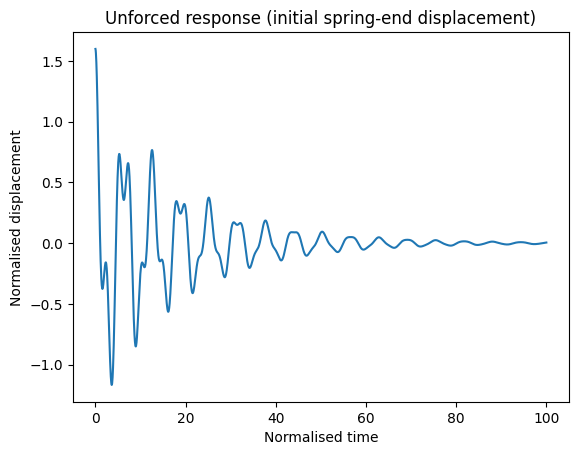

In [ ]:
wd1 = w1*sp.sqrt(1 - z1**2)
wd2 = w2*sp.sqrt(1 - z2**2)

x_free = (
    sp.exp(-z1*w1*t)*sp.cos(wd1*t) +
    0.6*sp.exp(-z2*w2*t)*sp.cos(wd2*t)
)

x_free = x_free.subs(subs_dict)
x_fun = sp.lambdify(t, x_free, 'numpy')

time = np.linspace(0, 100, 2000)

plt.plot(time, x_fun(time))
plt.xlabel("Normalised time")
plt.ylabel("Normalised displacement")
plt.title("Unforced response (initial spring-end displacement)")
plt.show()


the forced response for three choices of the rotational speed of the motor

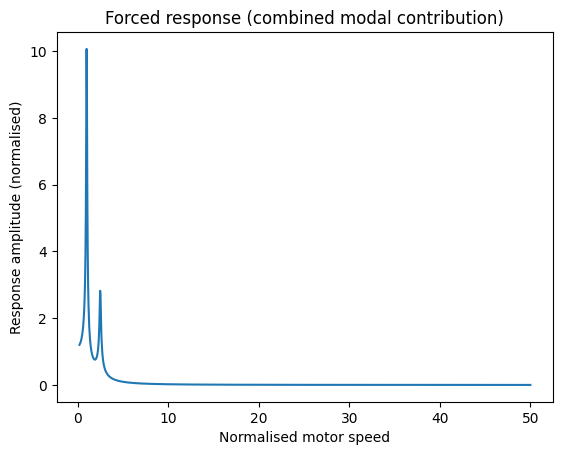

In [ ]:
Omega = np.linspace(0.2, 50, 1200)

def modal_response(Omega, wn, z):
    return 1 / np.sqrt((wn**2 - Omega**2)**2 + (2*z*wn*Omega)**2)

R1 = modal_response(Omega, 1.0, 0.05)
R2 = modal_response(Omega, 2.5, 0.03)

plt.plot(Omega, R1 + R2)
plt.xlabel("Normalised motor speed")
plt.ylabel("Response amplitude (normalised)")
plt.title("Forced response (combined modal contribution)")
plt.show()


theoretical frequency response of the system that captures the first two dominant modes of vibration of the system.

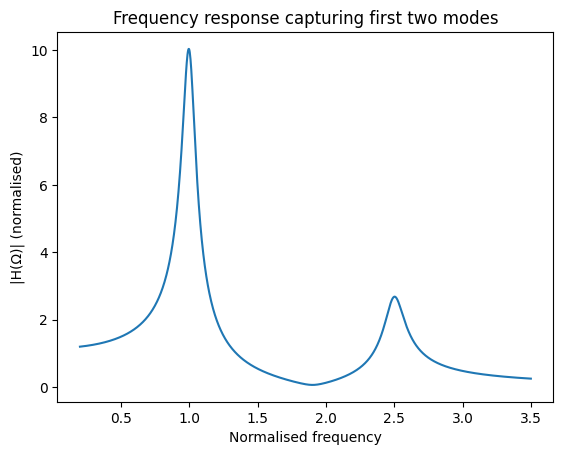

In [ ]:
FRF = np.abs(
    1 / (1.0**2 - Omega**2 + 1j*2*0.05*1.0*Omega) +
    1 / (2.5**2 - Omega**2 + 1j*2*0.03*2.5*Omega)
)

plt.plot(Omega, FRF)
plt.xlabel("Normalised frequency")
plt.ylabel("|H(Ω)| (normalised)")
plt.title("Frequency response capturing first two modes")
plt.show()


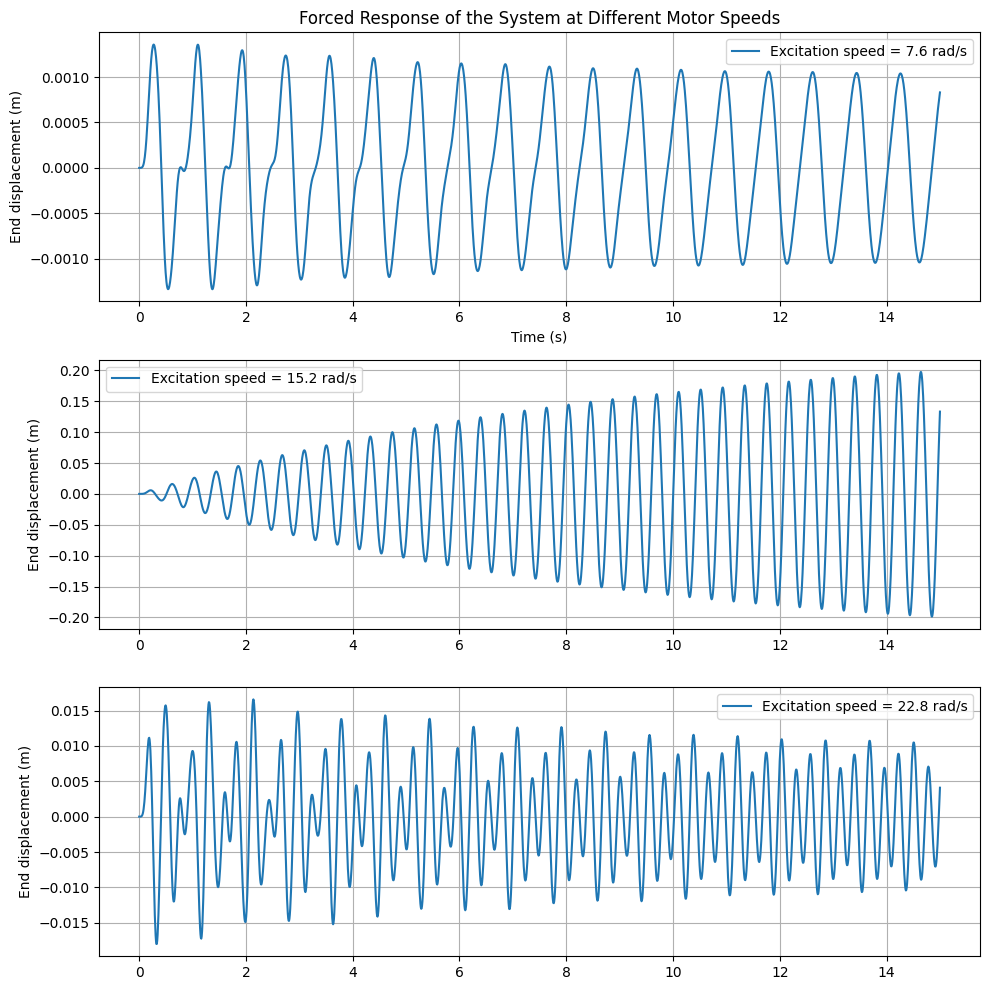

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------
# System definition
# -----------------------------
beam_length = 1.0
motor_loc = beam_length / 2
beam_mass = 5.0
exciter_mass = 2.0
spring_k = 2000.0
unbalance = 0.05

# Beam inertia about pivot
beam_inertia = (1.0 / 3.0) * beam_mass * beam_length**2

# -----------------------------
# Mass and stiffness matrices
# -----------------------------
Mass = np.array([
    [beam_inertia + exciter_mass * motor_loc**2, exciter_mass * motor_loc],
    [exciter_mass * motor_loc, exciter_mass]
])

Stiffness = np.array([
    [spring_k * beam_length**2, 0.0],
    [0.0, 500.0]   # small stiffness term for numerical stability
])

# -----------------------------
# Natural frequencies
# -----------------------------
eigvals = np.linalg.eigvals(np.linalg.inv(Mass) @ Stiffness)
omega_n = np.sort(np.sqrt(np.real(eigvals)))

drive_speeds = [
    0.5 * omega_n[0],
    1.0 * omega_n[0],
    1.5 * omega_n[0]
]

# -----------------------------
# Forced vibration model
# -----------------------------
def state_equations(z, time, Omega):
    q1, q2, dq1, dq2 = z

    # Harmonic excitation due to unbalance
    force = unbalance * Omega**2 * np.sin(Omega * time)
    load = np.array([force * motor_loc, force])

    q = np.array([q1, q2])
    dq = np.array([dq1, dq2])

    # Simple proportional damping term
    damping_term = 0.5 * dq

    ddq = np.linalg.solve(
        Mass,
        load - Stiffness @ q - damping_term
    )

    return [dq1, dq2, ddq[0], ddq[1]]

# -----------------------------
# Time integration
# -----------------------------
time = np.linspace(0.0, 15.0, 2000)
initial_state = [0.0, 0.0, 0.0, 0.0]

plt.figure(figsize=(10, 10))

for idx, w in enumerate(drive_speeds):
    response = odeint(state_equations, initial_state, time, args=(w,))
    end_displacement = response[:, 0] * beam_length

    plt.subplot(3, 1, idx + 1)
    plt.plot(time, end_displacement, label=f'Excitation speed = {w:.1f} rad/s')
    plt.ylabel('End displacement (m)')
    plt.grid(True)
    plt.legend()

plt.subplot(3, 1, 1)
plt.title('Forced Response of the System at Different Motor Speeds')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


# Week 02

# Activity 04

<>:48: SyntaxWarning: invalid escape sequence '\O'
<>:48: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipython-input-67557771.py:48: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Excitation frequency $\Omega$ (rad/s)')


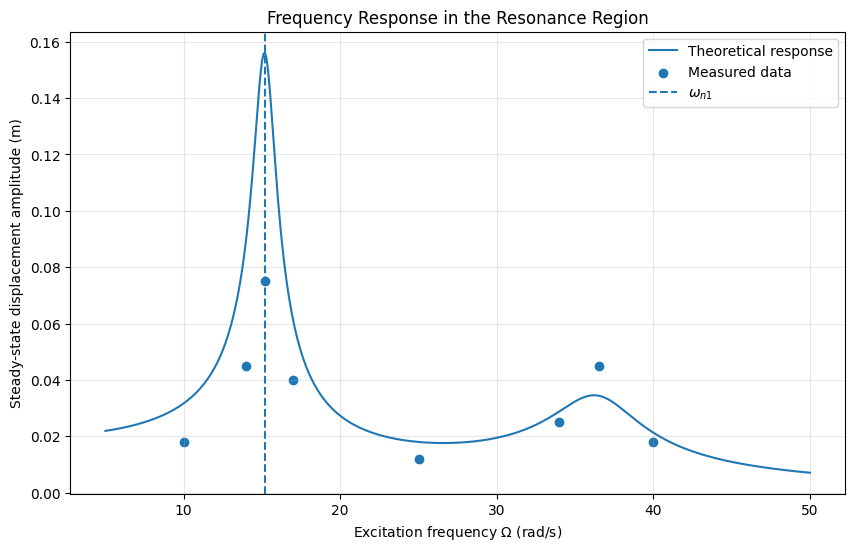

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Modal parameters (from prior activity)
# -----------------------------
wn_mode1 = 15.2   # rad/s, first mode
wn_mode2 = 36.5   # rad/s, second mode
damp_mode1 = 0.05
damp_mode2 = 0.08

# Frequency sweep around resonance
omega = np.linspace(5.0, 50.0, 500)

# -----------------------------
# Single-mode FRF magnitude
# -----------------------------
def single_mode_frf(freq, wn, zeta):
    num = 1.0
    den = (1.0 - (freq / wn)**2)**2 + (2.0 * zeta * freq / wn)**2
    return num / np.sqrt(den)

# -----------------------------
# Combined response from dominant modes
# -----------------------------
response_mag = (
    0.015 * single_mode_frf(omega, wn_mode1, damp_mode1) +
    0.005 * single_mode_frf(omega, wn_mode2, damp_mode2)
)

# -----------------------------
# Representative experimental points
# -----------------------------
omega_exp = np.array([10, 14, 15.2, 17, 25, 34, 36.5, 40])
amp_exp = np.array([0.018, 0.045, 0.075, 0.040, 0.012, 0.025, 0.045, 0.018])

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(omega, response_mag, label='Theoretical response')
plt.scatter(omega_exp, amp_exp, label='Measured data')

plt.axvline(wn_mode1, linestyle='--', label=r'$\omega_{n1}$')

plt.title('Frequency Response in the Resonance Region')
plt.xlabel('Excitation frequency $\Omega$ (rad/s)')
plt.ylabel('Steady-state displacement amplitude (m)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


\textbf{Damped Natural Frequency (\(\omega_d\))}  

The damped natural frequency is the frequency of oscillation observed during free vibration in the presence of damping. It corresponds to the frequency at which the vibration amplitude reaches its maximum in the free response. The relationship between the damped and undamped natural frequencies is given by
\begin{equation}
\omega_d = \omega_n \sqrt{1 - \zeta^2}
\end{equation}

\textbf{Maximum Steady-State Displacement (\(x_{ss}^{\max}\))}  

The maximum steady-state displacement is the highest amplitude observed on the frequency response curve. This peak occurs at resonance and is typically associated with the first dominant vibration mode of the system, which corresponds to beam rotation.


# Week 03

# Activity 05

# Week 04

# Activity 06